<a href="https://colab.research.google.com/github/Joon2000/machinelearning/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""데이터 전처리"""

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight)) #column_stck()로 fish_length와 fish_weight 합치기
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [5]:
from sklearn.model_selection import train_test_split #훈련 세트와 테스트 세트를 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) #기본적으로 25%를 테스트 세트로 만듬
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [6]:
print(test_target) #빙어의 비율이 적음

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42)  #stratify 비율에 맞게 데이터를 나눔
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [11]:
print(kn.predict([[25, 150]])) #도미를 빙어로 predict

[0.]


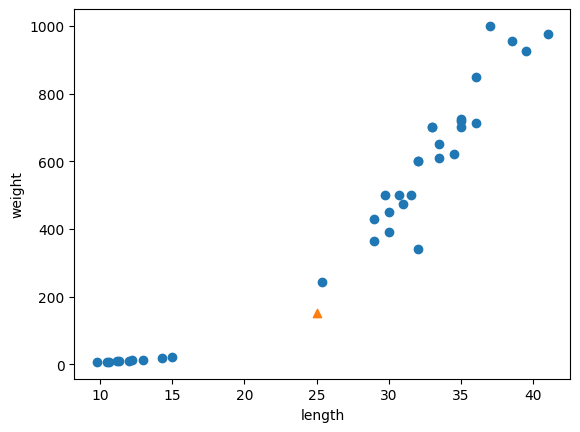

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#산점도 상에는 도미에 더 가깝지만 predict는 0(빙어)로 함

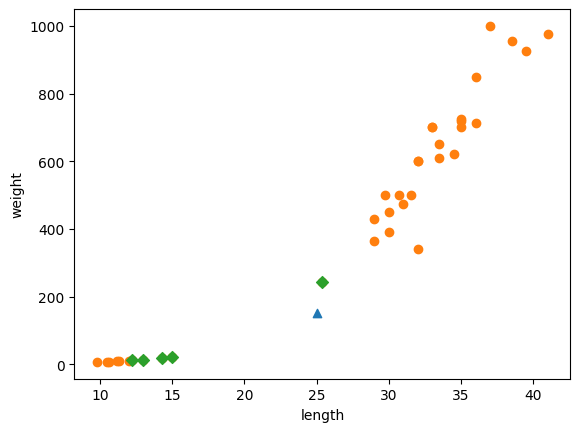

In [14]:
#이웃의 거리와 인덱스 구하기
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(25, 150, marker='^')
#이웃들의 분포도 그리기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


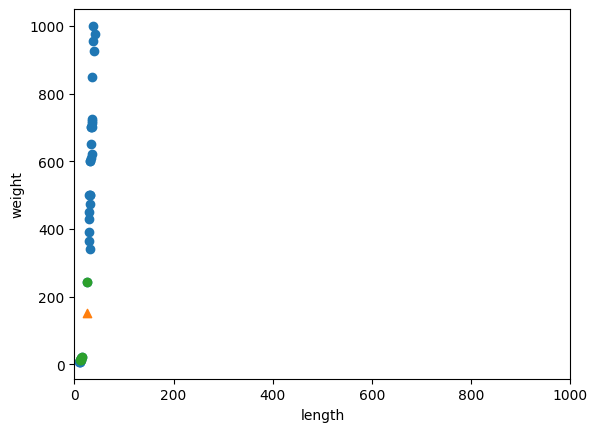

In [19]:
#x축(~40)과 y축(~1000)의 범위가 다르다
# 두 특성의 스케일(scale)이 다르다
#범위 맞추고 분포도 구하기
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1])
plt.xlim((0,1000)) #x의 범위를 1000까지 늘림
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#데이터 전처리(data preprocessing) 필요

In [21]:
#표준점수(standard score, z score)로 전처리
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)
train_scaled = (train_input-mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


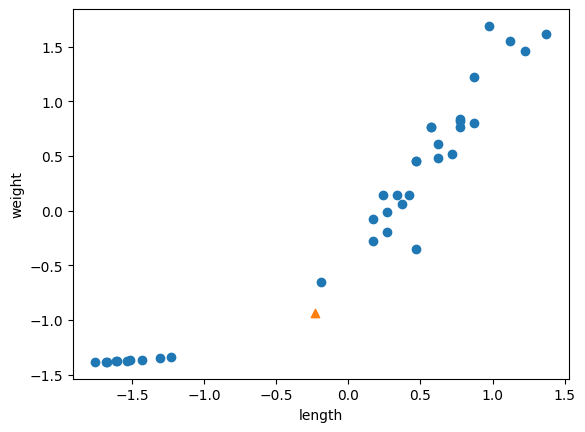

In [22]:
# 샘플 전처리
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
#훈련
kn.fit(train_scaled, train_target)
#test set 스케일링
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [24]:
#sample new predict
print(kn.predict([new]))

[1.]


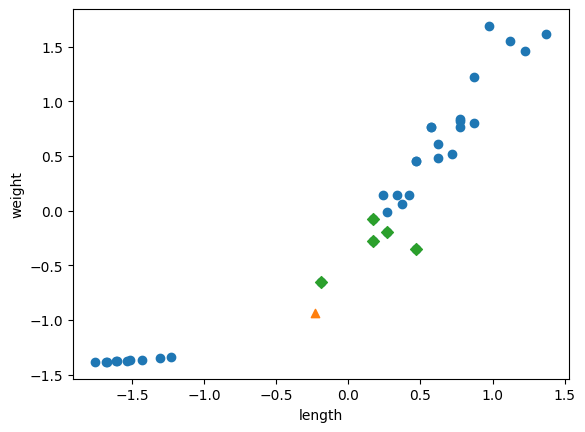

In [25]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()